In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
import numpy as np


In [2]:
test_bert = pd.read_csv('test_with_bert.csv', index_col=0)
test_w2v = pd.read_csv('test_with_w2v.csv', index_col=0)
test_glove = pd.read_csv('test_with_glove.csv', index_col=0)

In [3]:
test_bert['pred_bert_class'] = (test_bert['pred_bert'] >= 0.5).astype(int)


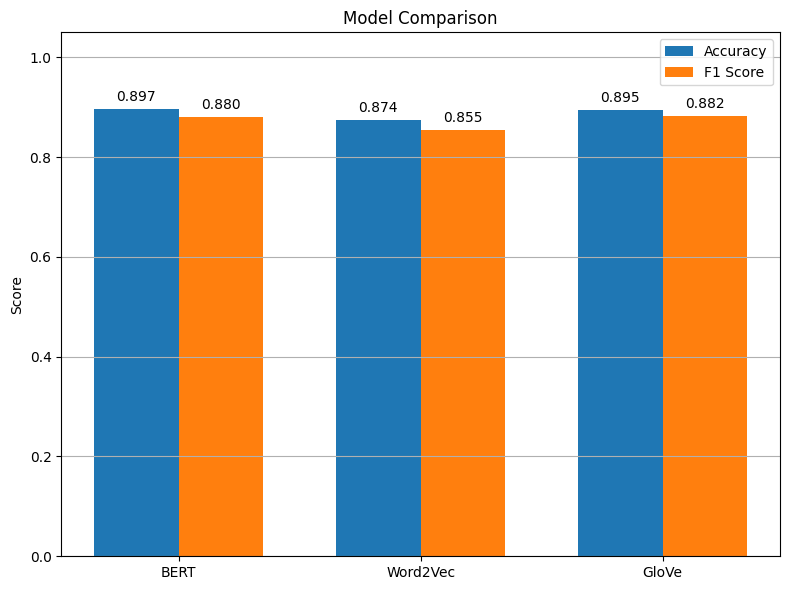

In [4]:
accs = [
    accuracy_score(test_bert['label'], test_bert['pred_bert_class']),
    accuracy_score(test_w2v['label'], test_w2v['pred_w2v']),
    accuracy_score(test_glove['label'], test_glove['pred_glove']),
]
f1s = [
    f1_score(test_bert['label'], test_bert['pred_bert_class']),
    f1_score(test_w2v['label'], test_w2v['pred_w2v']),
    f1_score(test_glove['label'], test_glove['pred_glove']),
]

models = ['BERT', 'Word2Vec', 'GloVe']
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 6))
bars1 = plt.bar(x - width/2, accs, width, label='Accuracy')
bars2 = plt.bar(x + width/2, f1s, width, label='F1 Score')

# Annotate bars with values
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.xticks(x, models)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


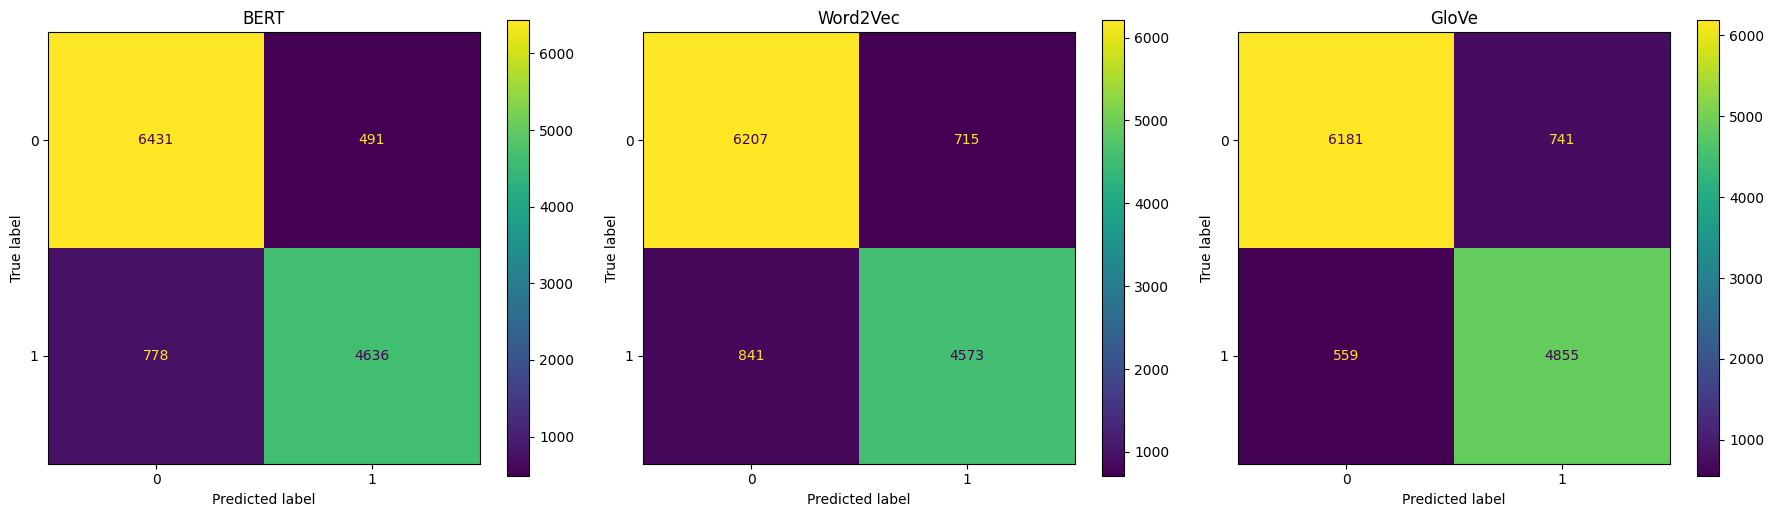

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# BERT
cm_bert = confusion_matrix(test_bert['label'], test_bert['pred_bert_class'])
ConfusionMatrixDisplay(cm_bert).plot(ax=axes[0])
axes[0].set_title("BERT")

# Word2Vec
cm_w2v = confusion_matrix(test_w2v['label'], test_w2v['pred_w2v'])
ConfusionMatrixDisplay(cm_w2v).plot(ax=axes[1])
axes[1].set_title("Word2Vec")

# GloVe
cm_glove = confusion_matrix(test_glove['label'], test_glove['pred_glove'])
ConfusionMatrixDisplay(cm_glove).plot(ax=axes[2])
axes[2].set_title("GloVe")

plt.tight_layout()
plt.show()


BERT+Catboost gave the best results overall with the highest accuracy (0.897) and a strong F1 score (0.88). GloVe+LSTM was very close, even slightly better in F1 (0.882), but a bit behind in accuracy. Word2Vec+LSTM had the lowest scores. So, BERT turned out the best!